 <font size="6">Predict the percentage of marks of an student </font>
 <font size="6">based on the number of study hours - Supervised ML </font>

By: Chirag Gupta

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

<font size="4">Importing Data From https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv  </font>

In [47]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
data.shape

(25, 2)

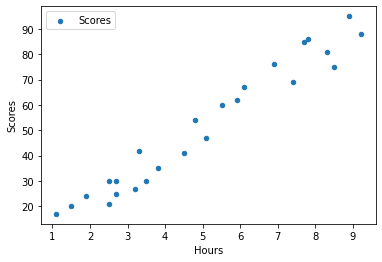

In [21]:
data.plot(kind='scatter' ,x='Hours', y='Scores', label='Scores')
plt.show()

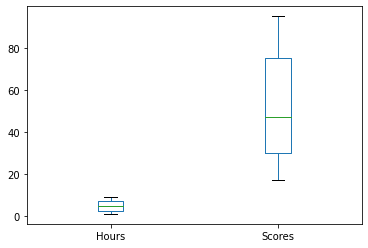

In [22]:
data.plot(kind='box')
plt.show()

In [43]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [49]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [50]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<font size="5">Linear Regression  </font>

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)

<font size="5">Plotting Regression  </font>

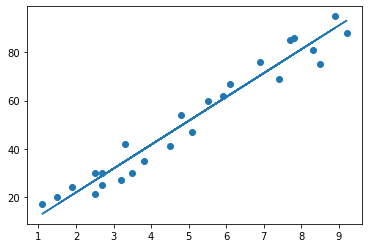

In [52]:
plt.scatter(X,y)
plt.plot(X, lr.coef_*X+lr.intercept_)

<font size="5">Prediction </font>

In [53]:
lr_pred = lr.predict(X_test)
lr_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [59]:
data1 = pd.DataFrame({'Actual':y_test, 'Prediction':lr_pred})
data1


,Actual,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [62]:
hour = 10.5
new_pred = lr.predict([[hour]])
print("Number of Hours in studied: {}".format(hour))
print("Predicted Scores of students: {}".format(new_pred[0]))

Number of Hours in studied: 10.5
Predicted Scores of students: 106.08005308817818


<font size="5">Evaluation </font>

In [65]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Score:',r2_score(y_test,lr_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,lr_pred))
print('Mean Squared Error:',mean_squared_error(y_test,lr_pred))

Score: 0.9454906892105354
Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
